# **Project Title: Online Retail Customer Segmentation**

**Project type** - Unsupervised ML

**Contribution** - Individual

## <b> Problem Description </b>

In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## **Importing Libraries and Loading Dataset**

In [214]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importing libraries necessary for clustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

from datetime import datetime
import math
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [215]:
#Load the dataset
customer_df=pd.read_csv('https://raw.githubusercontent.com/hamant-jagwan/Online_Retail_Customer_Segmentation_Unsupervised_leaning/refs/heads/main/Data.csv')

In [216]:
#checking top 5 rows of dataset
customer_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850.0,United Kingdom


In [217]:
# checking shape of dataset 
customer_df.shape

(541909, 8)

In [218]:
# basic information of dataset
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## <b> Data Description </b>

### <b>Attribute Information: </b>

* **InvoiceNo**: Invoice number. (Nominal), a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* **StockCode**: Product (item) code. (Nominal), a 5-digit integral number uniquely assigned to each distinct product.
* **Description**: Product (item) name. (Nominal).
* **Quantity**: The quantities of each product (item) per transaction. (Numeric).
* **InvoiceDate**: Invice Date and time. (Numeric), the day and time when each transaction was generated.
* **UnitPrice**: Unit price. (Numeric), Product price per unit in sterling.
* **CustomerID**: Customer number. (Numeric), a 5-digit integral number uniquely assigned to each customer.
* **Country**: Country name. (Nominal), the name of the country where each customer resides.

**Observation**: 
*As we can see we have most of null values in customerID and all other columns look fine. we can drop those null values in customerID columns as we are making customer segmentation and keeping those null values make no sense*

## **Data Cleaning**

**checking for null values**

In [219]:
# checking for null values in dataset
customer_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

**Observation** :
*Here we have null values present in our dataset like in CustomerID and Description. we can drop those null values in customerID columns as we are making customer segmentation and keeping those null values make no sense***

In [220]:
# dropping null values
customer_df.dropna(inplace = True)

In [221]:
# checking for missing values
customer_df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [222]:
customer_df.shape

(406829, 8)

*After removing null value from our dataset.*
*Now we have 406829 rows and 8 columns in our dataset.*

In [223]:
# changing datatype
customer_df['InvoiceNo'] = customer_df['InvoiceDate'].astype('str')

In [224]:
customer_df = customer_df[customer_df['InvoiceNo'].str.contains('C') == False]


*Here we dropped some InvoiceNo which starts with 'c' because 'c' indicates a cancellation.*

In [225]:
# Checking summary
customer_df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


## **Exploratory data analysis**

### **Description Name**

In [226]:
Description_df = customer_df['Description'].value_counts().reset_index()
Description_df.rename(columns={'Description': 'Description_Name','count': 'Count'}, inplace=True)

#top 5 Description Name
Description_df.head()

,Description_Name,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,2070
1,REGENCY CAKESTAND 3 TIER,1905
2,JUMBO BAG RED RETROSPOT,1662
3,ASSORTED COLOUR BIRD ORNAMENT,1418
4,PARTY BUNTING,1416


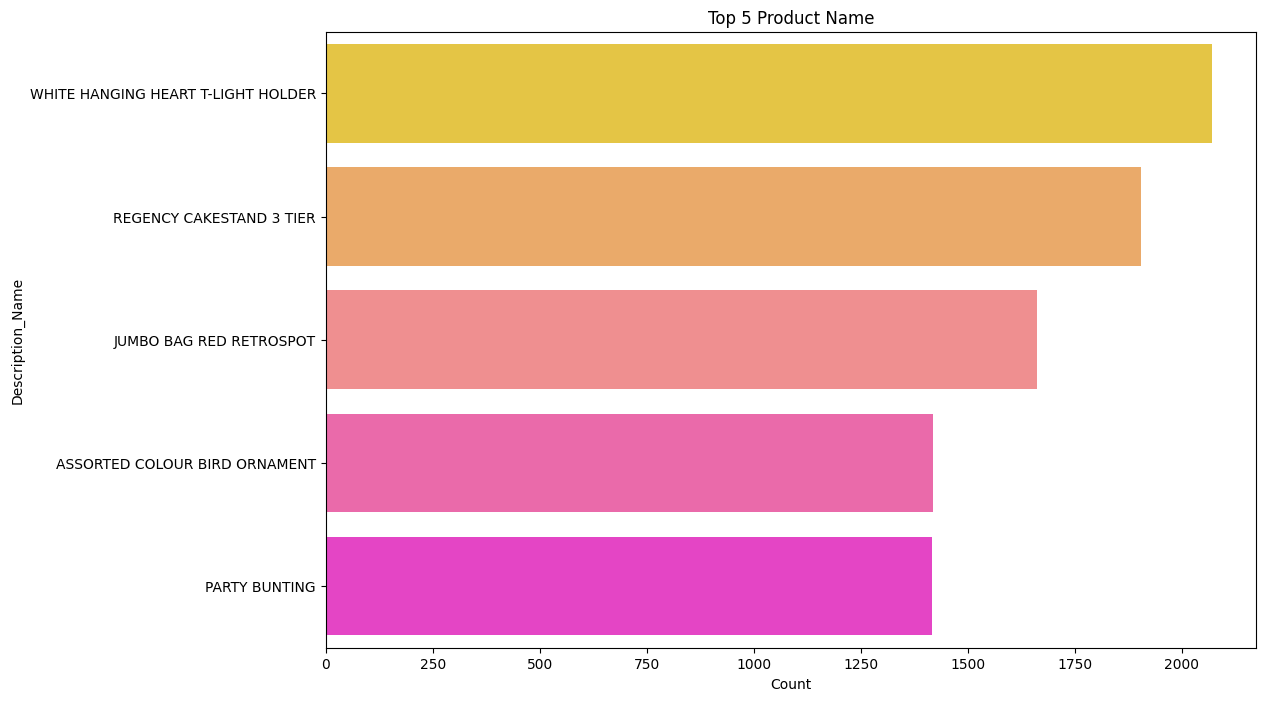

In [227]:
# plot top 5 product name
plt.figure(figsize = (12,8))
plt.title('Top 5 Product Name')
sns.barplot(x = 'Count', y = 'Description_Name', data = Description_df[:5], palette = 'spring_r');

In [228]:
# bottom 5 description name
Description_df.tail()

,Description_Name,Count
3891,LIGHT DECORATION BATTERY OPERATED,1
3892,"LETTER ""Z"" BLING KEY RING",1
3893,CROCHET LILAC/RED BEAR KEYRING,1
3894,MIDNIGHT BLUE CRYSTAL DROP EARRINGS,1
3895,WHITE STONE/CRYSTAL EARRINGS,1


### **StockCode Name**

In [229]:
StockCode_df = customer_df['StockCode'].value_counts().reset_index()
StockCode_df    
StockCode_df.rename(columns = {'StockCode' : 'StockCode_Name','count': 'Count'}, inplace = True)

# top 5 stockcode name
StockCode_df.head()


,StockCode_Name,Count
0,85123A,2077
1,22423,1905
2,85099B,1662
3,84879,1418
4,47566,1416


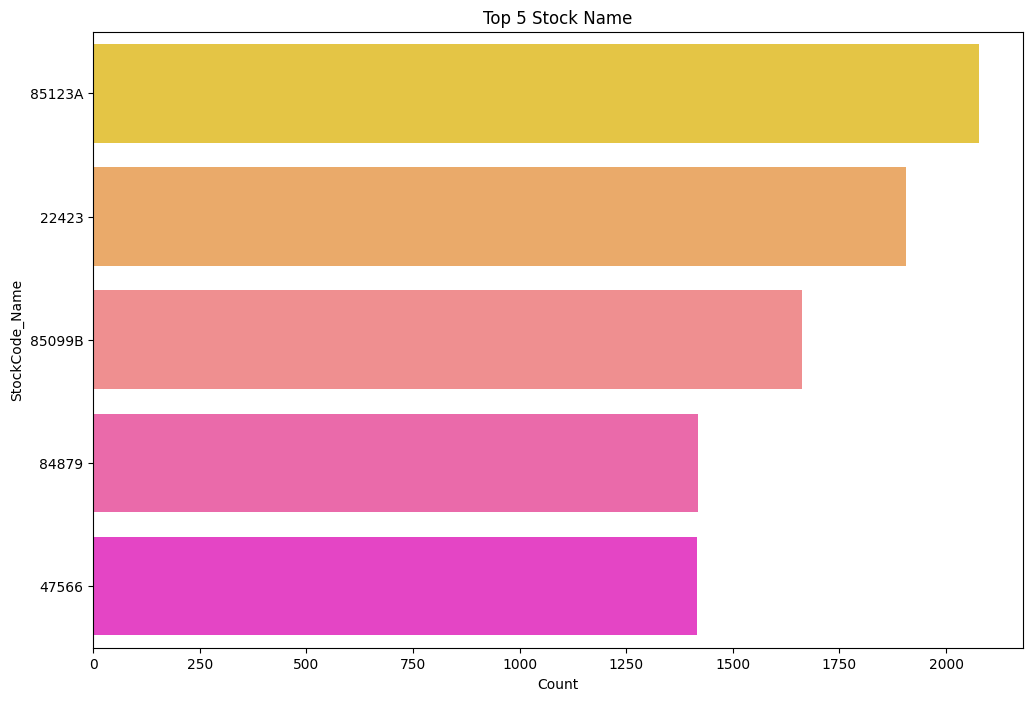

In [230]:
#plot top 5 stockcode name
plt.figure(figsize=(12,8))
plt.title('Top 5 Stock Name')
sns.barplot(x='Count',y='StockCode_Name',data=StockCode_df[:5], palette='spring_r');

In [231]:
StockCode_df.tail()

,StockCode_Name,Count
3679,85023C,1
3680,35597A,1
3681,16169N,1
3682,90065B,1
3683,90162A,1


### **Country Name**

In [232]:
country_df = customer_df['Country'].value_counts().reset_index()

#top 5 country name
country_df.head()

,Country,count
0,United Kingdom,361878
1,Germany,9495
2,France,8491
3,EIRE,7485
4,Spain,2533


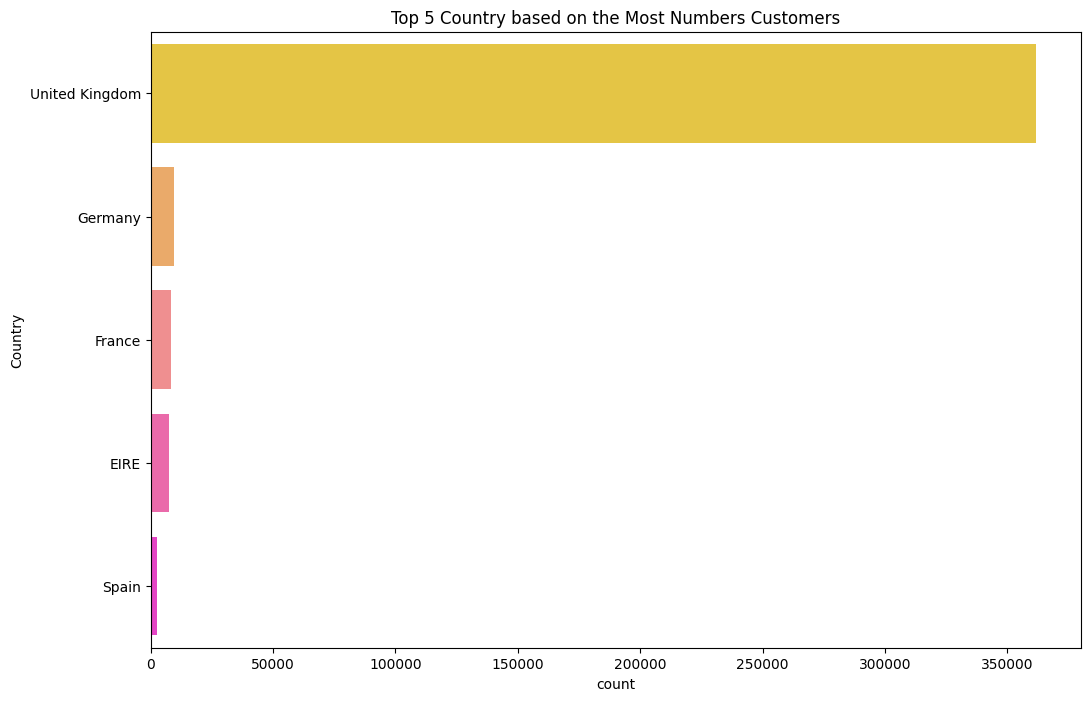

In [233]:
#plot top 5 country name
plt.figure(figsize=(12,8))
plt.title('Top 5 Country based on the Most Numbers Customers')
sns.barplot(x='count',y='Country',data=country_df[:5], palette='spring_r');

In [234]:
# bottom 5 country name
country_df.tail()

,Country,count
32,Lithuania,35
33,Brazil,32
34,Czech Republic,30
35,Bahrain,17
36,Saudi Arabia,10


### **Distribution of Quality**

In [235]:
customer_df['Quantity'].sort_values()

540422   -80995
61624    -74215
4287      -9360
160145    -3114
160144    -2000
          ...  
206121     4300
421632     4800
502122    12540
61619     74215
540421    80995
Name: Quantity, Length: 406829, dtype: int64

*There is a typing error in the Quantity column. There is a minimum value of -80995 which is wrong because It is impossible to get negative Quantity*

In [236]:
customer_df['Quantity'] = customer_df['Quantity'].apply(abs)


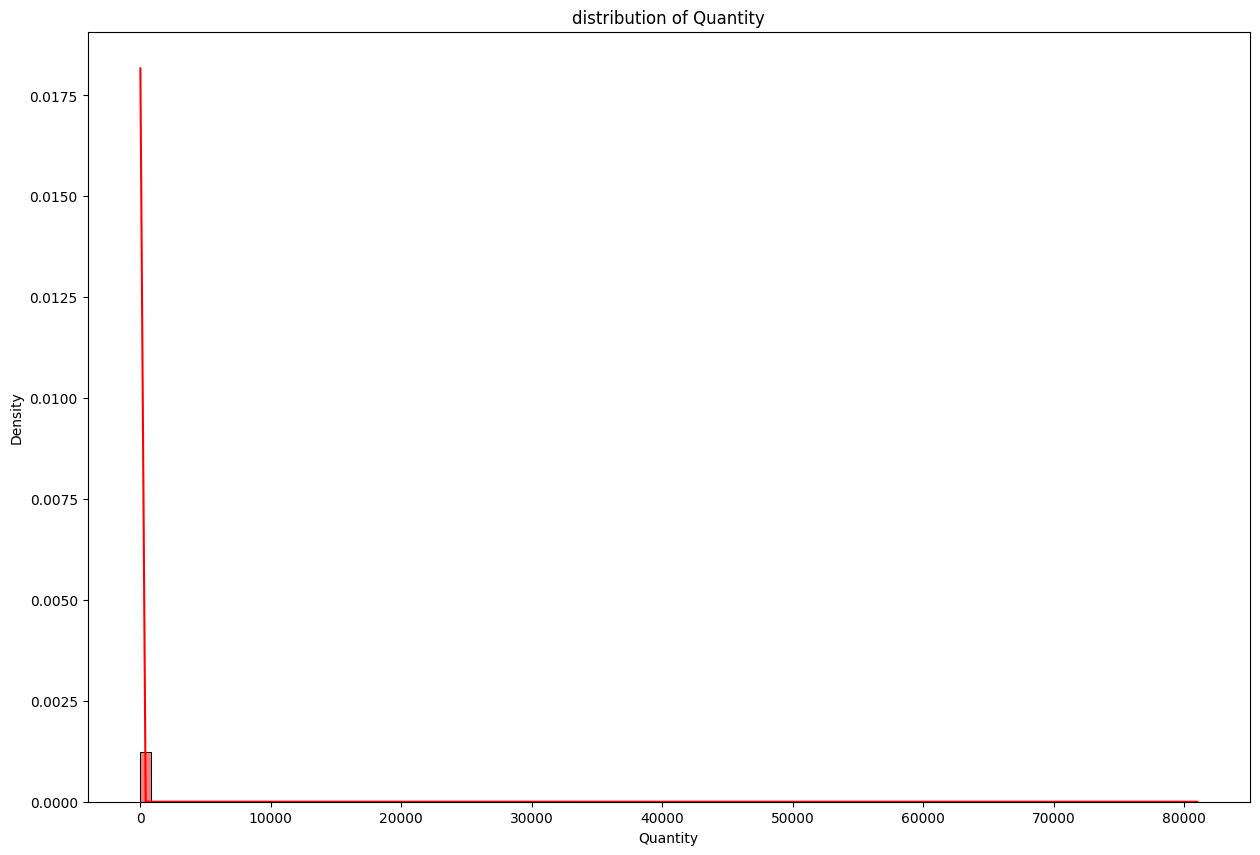

In [237]:
#distribution of Quantity
plt.figure(figsize=(15,10))
plt.title('distribution of Quantity')
sns.histplot(customer_df['Quantity'],color="r",kde= True , stat= 'density', bins= 100);

**Observation:** 
*Here we can see that its a Positively skewed (or right-skewed) distribution. It is a type of distribution in which most values are clustered around the left tail of the distribution*

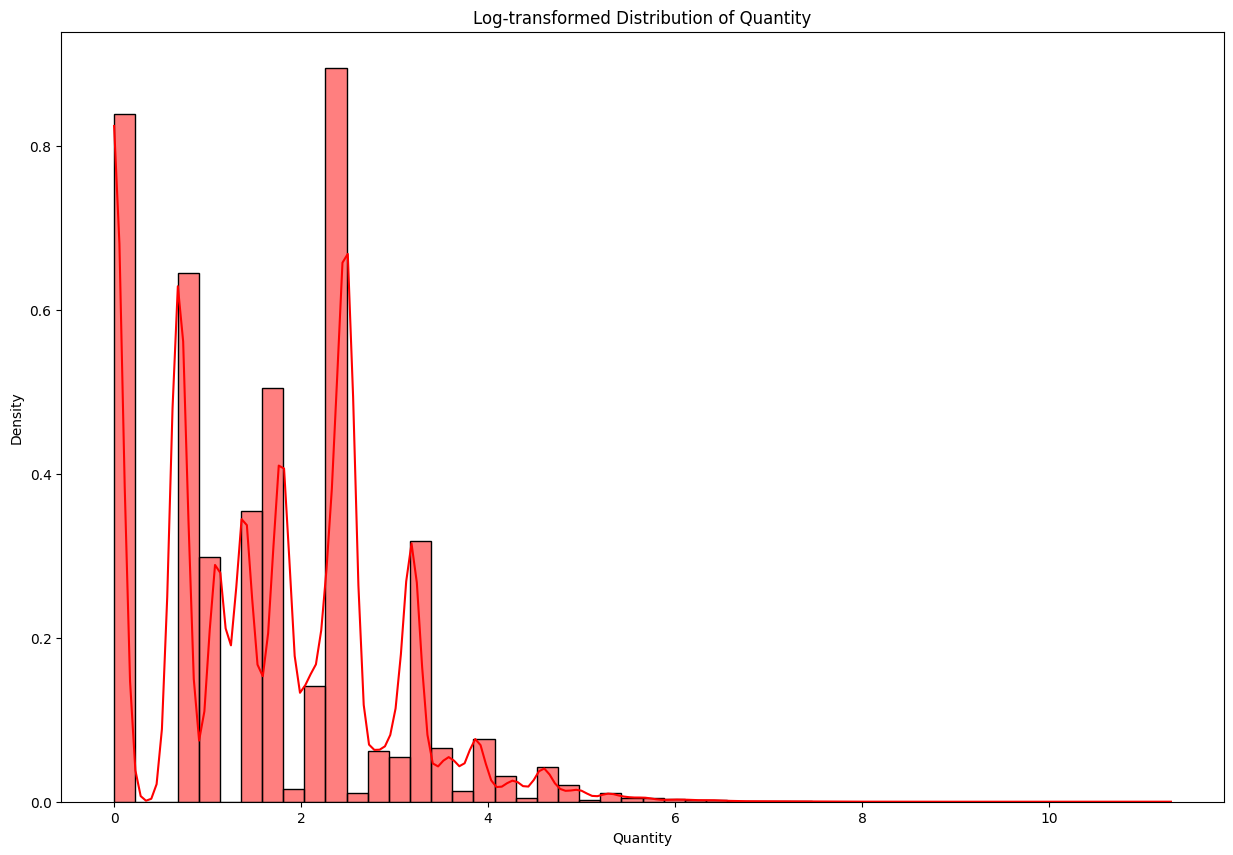

In [238]:
plt.figure(figsize=(15,10))
plt.title('Log-transformed Distribution of Quantity')
sns.histplot(np.log(customer_df['Quantity']), color="r",stat = 'density', kde=True, bins=50)
plt.show()

### **Distribution of Unit Price**

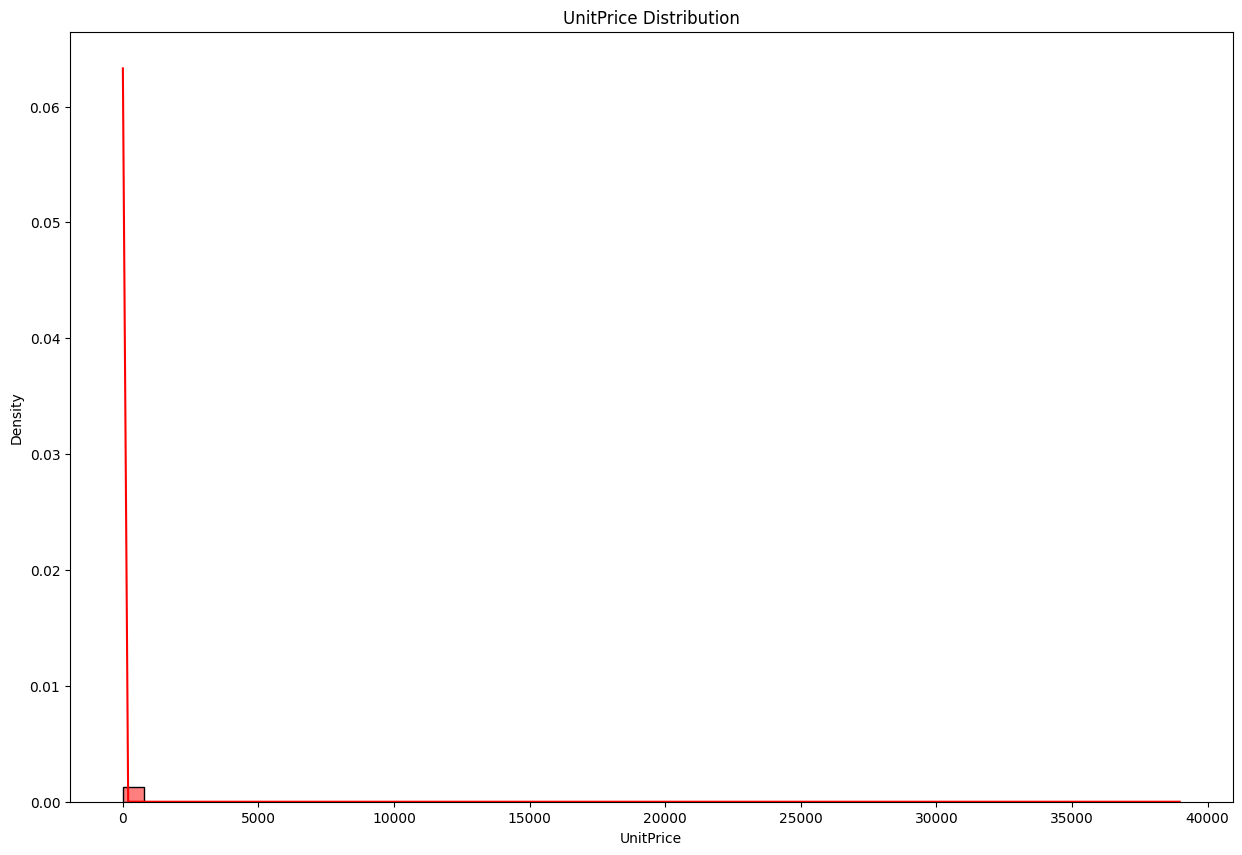

In [239]:
plt.figure(figsize=(15,10))
plt.title('UnitPrice Distribution')
sns.histplot(customer_df['UnitPrice'], color="r", bins=50, kde=True, stat='density');

**Observation:**
*From the distribution of unit price, we can say that most items have a lower price range.*



## **Feature Engineering**

In [240]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


### **Creation of Month, Day and Hour from Invoice date**

In [241]:
customer_df['InvoiceDate']

0         12-01-2010 08:26
1         12-01-2010 08:26
2         12-01-2010 08:26
3         12-01-2010 08:26
4         12-01-2010 08:26
                ...       
541904    12-09-2011 12:50
541905    12-09-2011 12:50
541906    12-09-2011 12:50
541907    12-09-2011 12:50
541908    12-09-2011 12:50
Name: InvoiceDate, Length: 406829, dtype: object

In [243]:
#Converting InvoiceDate columns into date time format
customer_df["InvoiceDate"] = pd.to_datetime(customer_df["InvoiceDate"] , errors= "coerce" , infer_datetime_format= True)

In [ ]:
# Creating a new features from Invoicedate
customer_df['Month'] = customer_df['InvoiceDate'].dt.month_name()
customer_df['Day'] = customer_df['InvoiceDate'].dt.day_name()
customer_df['Hour'] = customer_df['InvoiceDate'].dt.hour

#### **Months**

In [250]:
customer_df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Month', 'Day', 'Hour',
       'TotalAmount'],
      dtype='object')

In [258]:
#creating month dataframe
month_df = customer_df['Month'].value_counts().reset_index()
month_df.rename(columns={'Month': 'Month_Name'}, inplace=True)
month_df.rename(columns={'count': 'Count'}, inplace=True)
month_df

,Month_Name,Count
0,December,35361
1,November,23556
2,October,19880
3,September,13613
4,May,12408
5,August,11587
6,June,11297
7,April,10492
8,March,9717
9,July,9290


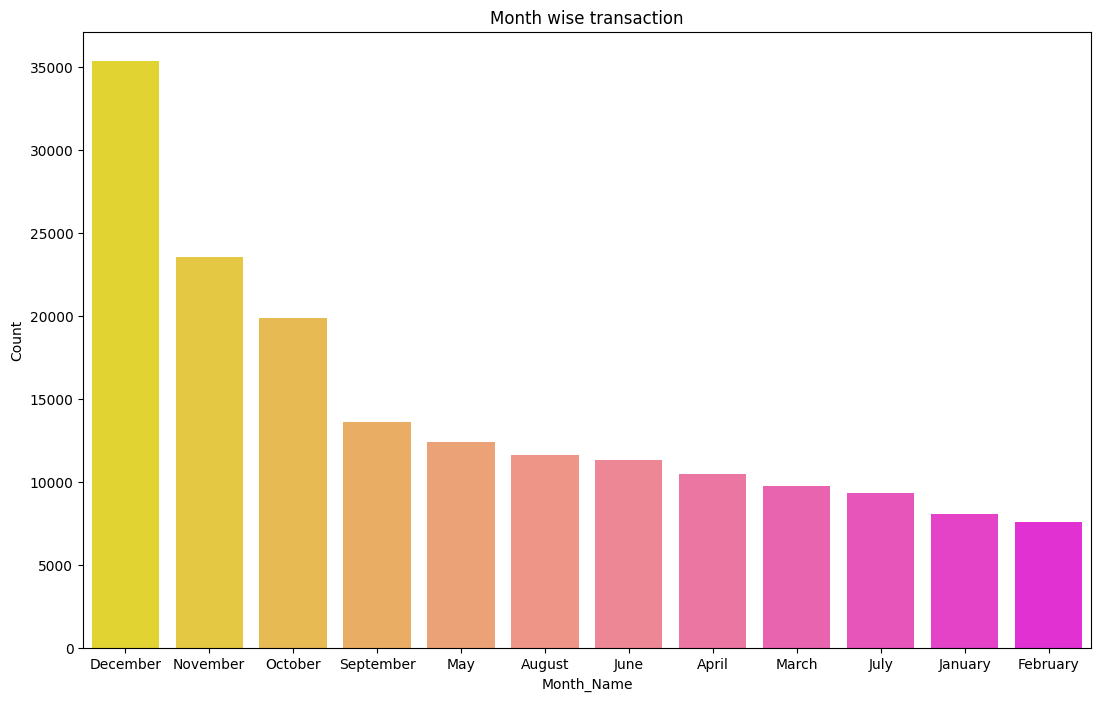

In [260]:
#plotting for month
plt.figure(figsize=(13,8))
plt.title('Month wise transaction')
sns.barplot(x='Month_Name',y='Count',data=month_df,palette='spring_r');

**Observation:** 
* Most numbers of customers have purchased the gifts in the month of November, October and December.As we all know they have festive season in end of the year as well new year to celebrate so we have highest numbers of transaction in november, october, december as company have most of the customer wholesales who are keeping stocks for festive season.

* Least numbers of purchasing are in the month of April and February.

#### **Days**

In [264]:
#creating day dataframe
day_df = customer_df['Day'].value_counts().reset_index()
day_df.rename(columns={'Day': 'Day_Name'}, inplace=True)
day_df.rename(columns={'count': 'Count'}, inplace=True)
day_df
     

,Day_Name,Count
0,Thursday,35486
1,Wednesday,29519
2,Tuesday,28206
3,Friday,27232
4,Monday,26281
5,Sunday,26058


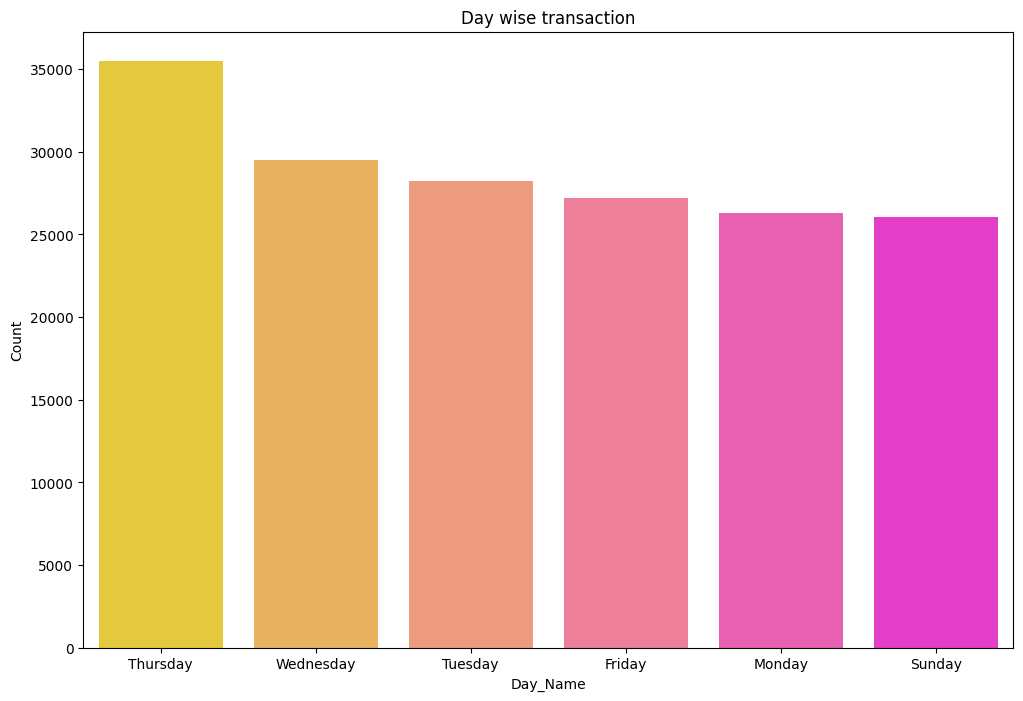

In [265]:
#plotting for days
plt.figure(figsize=(12,8))
plt.title('Day wise transaction')
sns.barplot(x='Day_Name',y='Count',data=day_df, palette='spring_r');

**Observation:**

We can see the maximum number of transactions are for Thursday but we can also see there are no transactions on Saturday at this point I have no idea why but there can be reasons probably data is not available for Saturdays or no transactions happened on Saturday.

Most of the customers purchased the items on Thursday, Wednesday and Tuesday.

#### **Hours**

In [266]:
#Creating hour dataframe
hour_df = customer_df['Hour'].value_counts().reset_index()
hour_df.rename(columns={'Hour': 'Hours'}, inplace=True)
hour_df.rename(columns={'count': 'Count'}, inplace=True)
hour_df

,Hours,Count
0,12.0,32934
1,13.0,25166
2,14.0,23543
3,11.0,20995
4,15.0,18233
5,10.0,16935
6,16.0,10856
7,9.0,9889
8,17.0,6469
9,8.0,3885


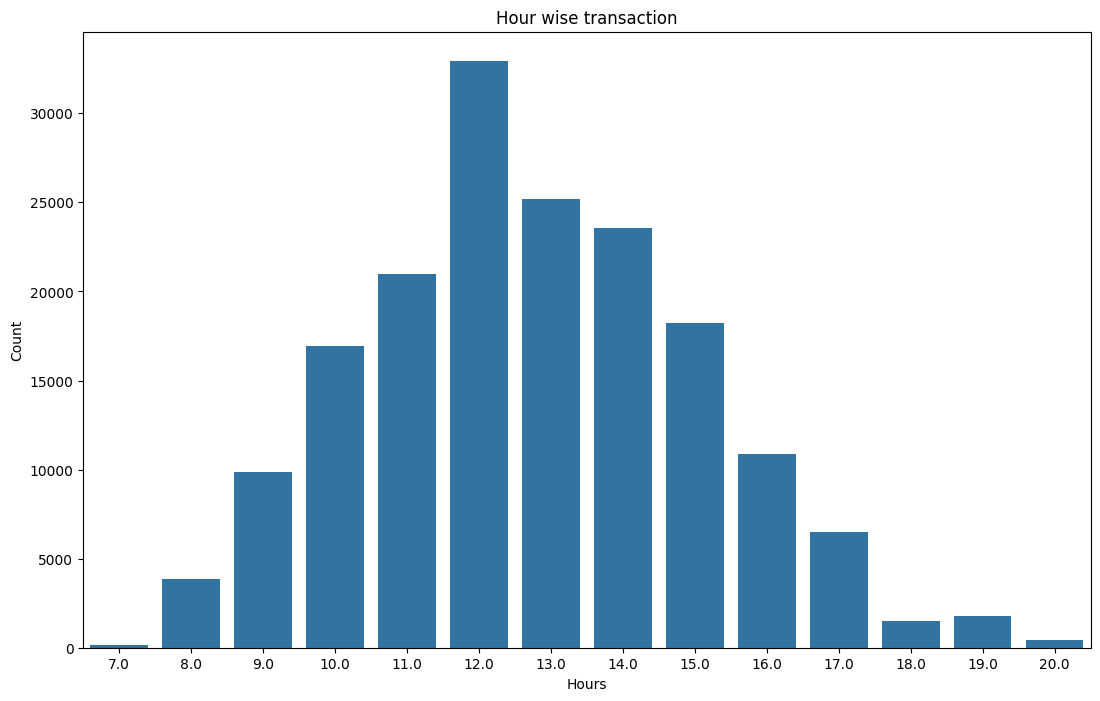

In [267]:
#plotting for hour
plt.figure(figsize=(13,8))
plt.title('Hour wise transaction')
sns.barplot(x='Hours',y='Count',data=hour_df);

**Observation:**

From the above graph we can say that most numbers of purchasing is done between 12pm clock to 3pm.

In [282]:
# dividing hours into morning, afternoon and evening
def time_type(time):
  if(time>=6 and time<=11):
    return "Morning"
  elif(time>=12 and time<=17):
    return 'Afternoon'
  else:
    return "Evening"

In [283]:
#applying function we created on hour column
customer_df['Time_type'] = customer_df['Hour'].apply(time_type)

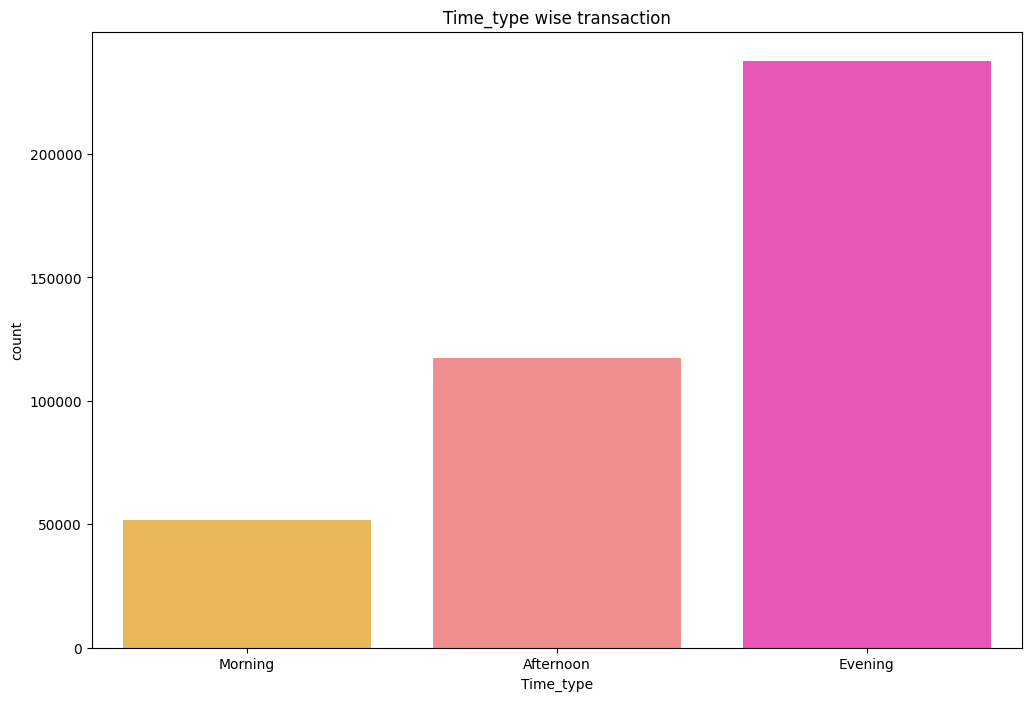

In [284]:
#plotting for time type
plt.figure(figsize=(12,8))
plt.title('Time_type wise transaction')
sns.countplot(x='Time_type',data=customer_df, palette='spring_r');

**Observation:**

Most of the customers have purchased the items in the Evening.

Moderate numbers of customers have purchased the items in Afternoon and least numbers of customers have purchased the items in the Morning.To increase transacction in the morning we can do one thing provide the early birds offers/discounts at morning.

### **Creation and distribution of total amount**

In [ ]:
# Creating a new feature TotalAmount from product of Quantity and Unitprice
customer_df['TotalAmount'] = customer_df['Quantity']*customer_df['UnitPrice']

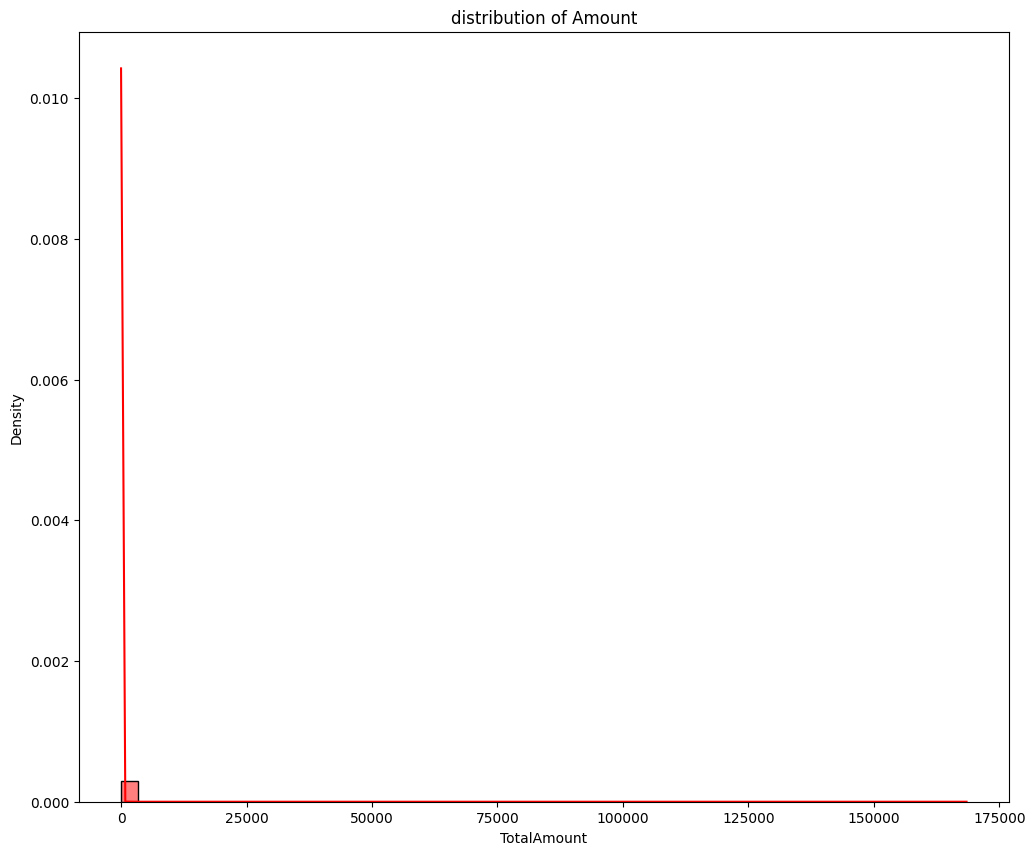

In [ ]:
# checking distribution for Total amount
plt.figure(figsize = (12,10))
plt.title('distribution of Amount')
sns.histplot(customer_df['TotalAmount'],bins = 50 , kde= True ,color = 'r', stat = 'density');